In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from scipy.stats import ttest_rel
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [4]:
data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [5]:
data.shape

(8594, 13)

Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

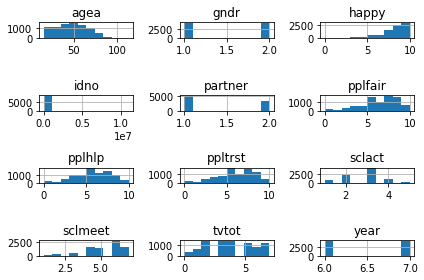

In [88]:
data.hist()
plt.tight_layout()

In [62]:
data.groupby(['cntry', 'year']).describe()['ppltrst']

count      mean       std  min   25%  50%  75%   max
cntry year                                                       
CH    6      773.0  5.677878  2.130701  0.0  4.00  6.0  7.0  10.0
      7      773.0  5.751617  2.143888  0.0  5.00  6.0  7.0  10.0
CZ    6      651.0  4.362519  2.409738  0.0  3.00  4.0  6.0  10.0
      7      657.0  4.424658  2.305389  0.0  3.00  5.0  6.0  10.0
DE    6       14.0  5.214286  1.528125  3.0  4.25  5.0  6.5   8.0
      7       14.0  5.357143  2.530039  2.0  3.25  5.5  7.0  10.0
ES    6     1213.0  5.114592  2.183623  0.0  4.00  5.0  7.0  10.0
      7     1211.0  4.895128  2.148165  0.0  3.00  5.0  6.0  10.0
NO    6      730.0  6.649315  1.749868  0.0  5.00  7.0  8.0  10.0
      7      730.0  6.598630  1.811183  0.0  5.00  7.0  8.0  10.0
SE    6      906.0  6.058499  2.055554  0.0  5.00  7.0  8.0  10.0
      7      908.0  6.257709  2.005422  0.0  5.00  7.0  8.0  10.0

In [91]:
#Overall test of ppltrst differences
ttest_rel(np.asarray(data[(data.year == 7)]['ppltrst']),
         np.asarray(data[(data.year == 6)]['ppltrst']), nan_policy = 'omit')

Ttest_relResult(statistic=-0.07575168043269885, pvalue=0.9396201977999982)

In [90]:
for country in data.cntry.unique():
    print('Relative T-test results for {}: {}'.format(
        country,
        ttest_rel(np.asarray(data[(data.year == 7) & (data.cntry == country)]['ppltrst']),
         np.asarray(data[(data.year == 6) & (data.cntry == country)]['ppltrst']), nan_policy = 'omit',
    )
         ))

Relative T-test results for CH: Ttest_relResult(statistic=0.6586851756725737, pvalue=0.5102943511301135)
Relative T-test results for CZ: Ttest_relResult(statistic=0.5001638336887216, pvalue=0.617129268240474)
Relative T-test results for DE: Ttest_relResult(statistic=0.18399501804849683, pvalue=0.8568563797095805)
Relative T-test results for ES: Ttest_relResult(statistic=-2.4561906976601646, pvalue=0.014181580725320272)
Relative T-test results for NO: Ttest_relResult(statistic=-0.5073077081124404, pvalue=0.61209257015177)
Relative T-test results for SE: Ttest_relResult(statistic=2.0671082026033982, pvalue=0.03900781670958545)


Answer: Using a threshold P-value of 0.05, the only significant group differences in trust are observed in ES and SE. The overall group did not show an insignificant change between years.

Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [93]:
data.groupby(['cntry', 'year']).describe()['happy']

count      mean       std  min   25%  50%   75%   max
cntry year                                                        
CH    6      770.0  8.088312  1.437920  0.0  7.00  8.0  9.00  10.0
      7      773.0  8.116429  1.405725  0.0  7.00  8.0  9.00  10.0
CZ    6      646.0  6.770898  2.053582  0.0  5.00  7.0  8.00  10.0
      7      652.0  6.914110  1.902860  0.0  6.00  7.0  8.00  10.0
DE    6       14.0  7.428571  1.650841  4.0  6.25  8.0  8.00  10.0
      7       14.0  7.857143  1.292412  5.0  7.25  8.0  8.75  10.0
ES    6     1212.0  7.548680  1.913084  0.0  7.00  8.0  9.00  10.0
      7     1212.0  7.419967  1.872315  0.0  7.00  8.0  9.00  10.0
NO    6      727.0  8.251719  1.427270  0.0  8.00  8.0  9.00  10.0
      7      731.0  7.915185  1.581027  0.0  7.00  8.0  9.00  10.0
SE    6      907.0  7.907387  1.521814  1.0  7.00  8.0  9.00  10.0
      7      905.0  7.946961  1.406155  3.0  7.00  8.0  9.00  10.0

In [92]:
#Overall test of ppltrst differences
ttest_rel(np.asarray(data[(data.year == 7)]['happy']),
         np.asarray(data[(data.year == 6)]['happy']), nan_policy = 'omit')

Ttest_relResult(statistic=-1.512017148440053, pvalue=0.13060358854871945)

Overall, people did not report significant changes in their happiness ratings from 2012 to 2014. 

In [94]:
for country in data.cntry.unique():
    print('Relative T-test results for {}: {}'.format(
        country,
        ttest_rel(np.asarray(data[(data.year == 7) & (data.cntry == country)]['happy']),
         np.asarray(data[(data.year == 6) & (data.cntry == country)]['happy']), nan_policy = 'omit',
    )
         ))

Relative T-test results for CH: Ttest_relResult(statistic=0.319412957862232, pvalue=0.7495001355429063)
Relative T-test results for CZ: Ttest_relResult(statistic=1.4561384833039597, pvalue=0.1458454843389451)
Relative T-test results for DE: Ttest_relResult(statistic=0.8062257748298549, pvalue=0.4346138707734991)
Relative T-test results for ES: Ttest_relResult(statistic=-1.613832417735418, pvalue=0.10682451556479494)
Relative T-test results for NO: Ttest_relResult(statistic=-4.2856826576235925, pvalue=2.067453013405473e-05)
Relative T-test results for SE: Ttest_relResult(statistic=0.5581637086030012, pvalue=0.5768709591233714)


Answer: The only significant change were members of Norway, who reported being much less happy 2 years later. 

Who reported watching more TV in 2012, men or women?

In [107]:
from scipy.stats import ttest_ind
men12=np.asarray(data[(data.year==6)&(data.gndr==1.0)]['tvtot'])
fem12=np.asarray(data[(data.year==6)&(data.gndr==2.0)]['tvtot'])
ttest_ind(men12, fem12, nan_policy='omit')

Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.49023604027095813)

In [108]:
data.groupby(['gndr', 'year']).mean()['tvtot']

gndr  year
1.0   6       3.901906
      7       3.749653
2.0   6       3.944393
      7       3.840395
Name: tvtot, dtype: float64

These two samples are independent, so we will test them independently to see whether the differences in means are significant given their sizes and standard deviation. At first look, women scored 0.04 higher, but given the sample size and the ttest results we can conclude this is not a significant difference, so women did not watch significantly more TV than men in 2012.

Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [110]:
print(data.groupby(['partner']).mean()['happy'])
print(data.groupby(['partner']).count()['happy'])


partner
1.0    7.895687
2.0    7.372221
Name: happy, dtype: float64
partner
1.0    5263
2.0    3283
Name: happy, dtype: int64


In [111]:
partners=np.asarray(data[(data.year==6)&(data.partner==1.0)]['tvtot'])
loners=np.asarray(data[(data.year==6)&(data.partner==2.0)]['tvtot'])
ttest_ind(partners, loners, nan_policy='omit')

Ttest_indResult(statistic=1.617540609819883, pvalue=0.10583529263983531)

Average reported happiness is much higher for people living with partners, but given the large difference in sample sizes, the results were not determined to be significant.

Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

- The sclmeet variable is quite abnormally distributed, so nonparametric methods must be utilized in order to deliver an effective result. The oneway ANOVA below illustrates there are strong differences present between at least two of the groups compared, so further tests will identify the most striking comparison.

In [146]:
from scipy.stats import median_test
czm= np.asarray(data[data.cntry=='CZ']['sclmeet'].dropna())
chm=np.asarray(data[data.cntry=='CH']['sclmeet'].dropna())
esm= np.asarray(data[data.cntry=='ES']['sclmeet'].dropna())
sem = np.asarray(data[data.cntry=='SE']['sclmeet'].dropna())
tval, pval, m, tb= median_test(czm, chm, esm, sem)
print(tval, pval)

245.27128935092696 6.89508489253404e-53


In [147]:
from scipy.stats import kruskal
meets=[czm, chm, esm, sem]
for pointer, country in enumerate(meets):
    print(kruskal(meets[pointer], meets[pointer-1]))

KruskalResult(statistic=271.97209049187654, pvalue=4.217998390504889e-61)
KruskalResult(statistic=98.0929684717642, pvalue=3.9919383581262487e-23)
KruskalResult(statistic=16.521750253447568, pvalue=4.809519199594451e-05)
KruskalResult(statistic=24.442840707540046, pvalue=7.6547434753428e-07)


Using the Kruskal-Wallis test, we may conclude that there are major differences in how often people meet socially across countries. The most pronounced difference was between Czech Republic and Sweden. 

5.477134986225895

Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9CC53DB08>,
      dtype=object)

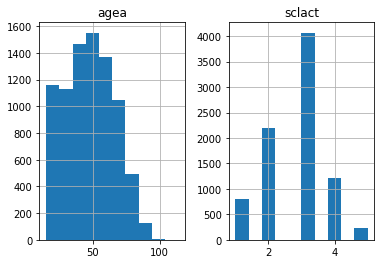

In [140]:
data[['sclact', 'agea']].hist()

Both variables resemble a normal distribution, but the discretized sclact variable warrants further testing.

In [148]:
from scipy.stats import normaltest
normaltest(data.sclact, nan_policy='omit')

NormaltestResult(statistic=2.0324239095429006, pvalue=0.36196348052555183)

In [165]:
czact= np.asarray(data[data.cntry=='CZ']['sclact'].dropna())
chact=np.asarray(data[data.cntry=='CH']['sclact'].dropna())
esact= np.asarray(data[data.cntry=='ES']['sclact'].dropna())
seact = np.asarray(data[data.cntry=='SE']['sclact'].dropna())
tval, pval, m, tb= median_test(czact, chact, esact, seact)
print(tval, pval)
if pval < 0.01:
    print('Significant differences found!')

73.52936968928758 7.486194517613584e-16
Significant differences found!


In [163]:
#Create age bins to categorize ages
data['agebin']=pd.qcut(data.agea, 4, labels=['Young', 'Middle-Aged', 'Old', 'Retired'])
data.groupby('agebin').describe()['agea']

,count,mean,std,min,25%,50%,75%,max
agebin,,,,,,,,
Young,2152.0,24.139870,5.378855,15.0,19.0,24.0,29.0,33.0
Middle-Aged,2079.0,40.631073,4.021958,34.0,37.0,41.0,44.0,47.0
Old,2168.0,54.767989,4.287666,48.0,51.0,55.0,58.0,62.0
Retired,1956.0,72.321063,7.145917,63.0,67.0,71.0,76.0,114.0


In [167]:
data.groupby(['agebin', 'cntry']).describe()['sclact']

count      mean       std  min  25%  50%  75%  max
agebin      cntry                                                    
Young       CH     412.0  2.793689  0.867729  1.0  2.0  3.0  3.0  5.0
            CZ     316.0  2.901899  0.820296  1.0  3.0  3.0  3.0  5.0
            DE       3.0  2.666667  0.577350  2.0  2.5  3.0  3.0  3.0
            ES     561.0  2.700535  0.888106  1.0  2.0  3.0  3.0  5.0
            NO     387.0  2.963824  0.790968  1.0  3.0  3.0  3.0  5.0
            SE     466.0  2.954936  0.819197  1.0  2.0  3.0  3.0  5.0
Middle-Aged CH     359.0  2.724234  0.821667  1.0  2.0  3.0  3.0  5.0
            CZ     355.0  2.616901  0.805873  1.0  2.0  3.0  3.0  5.0
            DE       3.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0
            ES     648.0  2.591049  0.903905  1.0  2.0  3.0  3.0  5.0
            NO     370.0  2.840541  0.760815  1.0  2.0  3.0  3.0  5.0
            SE     327.0  2.902141  0.877232  1.0  2.0  3.0  3.0  5.0
Old         CH     390.0  2.753846  0.913156  1.0  2.0  3.0  3.0  5.0
            CZ     355.0  2.583099  0.924095  1.0  2.0  3.0  3.0  5.0
            DE      13.0  2.923077  1.115164  1.0  2.0  3.0  4.0  5.0
            ES     590.0  2.606780  0.994700  1.0  2.0  3.0  3.0  5.0
            NO     369.0  2.888889  0.773973  1.0  2.0  3.0  3.0  5.0
            SE     426.0  2.812207  0.882478  1.0  2.0  3.0  3.0  5.0
Retired     CH     324.0  2.700617  0.970078  1.0  2.0  3.0  3.0  5.0
            CZ     238.0  2.550420  0.999778  1.0  2.0  3.0  3.0  5.0
            DE       9.0  2.555556  0.726483  1.0  2.0  3.0  3.0  3.0
            ES     525.0  2.476190  1.054753  1.0  2.0  3.0  3.0  5.0
            NO     305.0  2.954098  0.841672  1.0  2.0  3.0  3.0  5.0
            SE     519.0  2.895954  0.930377  1.0  2.0  3.0  3.0  5.0

In [168]:
czact= np.asarray(data[(data.cntry=='CZ') & (data.agebin=='Young')]['sclact'].dropna())
chact= np.asarray(data[(data.cntry=='CH') & (data.agebin=='Young')]['sclact'].dropna())
esact= np.asarray(data[(data.cntry=='ES') & (data.agebin=='Young')]['sclact'].dropna())
seact= np.asarray(data[(data.cntry=='SE') & (data.agebin=='Young')]['sclact'].dropna())
tval, pval, m, tb= median_test(czact, chact, esact, seact)
print(tval, pval)

14.9070754526109 0.0018978061001684171


In [202]:
import itertools
countries = ['CZ', 'CH', 'ES', 'SE', 'NO']
ages = ['Young', 'Middle-Aged', 'Old', 'Retired']
for age in ages:
    for country1, country2 in itertools.combinations(countries, 2):
        group1= np.asarray(data[(data.cntry==country1) & (data.agebin==age)]['sclact'].dropna())
        group2= np.asarray(data[(data.cntry==country2) & (data.agebin==age)]['sclact'].dropna())
        print('T-test for {} members of {} and {}: '.format(age, country1, country2))
        stat, pval= kruskal(group1, group2, nan_policy='omit')
        if pval< 0.05:
            print('Test-Statistic: ', stat, 'P-value: ', pval)
            print('Significant Results found!')
        else:
            print('No Significant Differences Found.')

T-test for Young members of CZ and CH: 
Test-Statistic:  4.629220704586785 P-value:  0.03143183723789941
Significant Results found!
T-test for Young members of CZ and ES: 
Test-Statistic:  14.532896771767522 P-value:  0.00013773331197831608
Significant Results found!
T-test for Young members of CZ and SE: 
No Significant Differences Found.
T-test for Young members of CZ and NO: 
No Significant Differences Found.
T-test for Young members of CH and ES: 
No Significant Differences Found.
T-test for Young members of CH and SE: 
Test-Statistic:  9.04699486954712 P-value:  0.0026312696396601468
Significant Results found!
T-test for Young members of CH and NO: 
Test-Statistic:  8.074145750148068 P-value:  0.004490126965285209
Significant Results found!
T-test for Young members of ES and SE: 
Test-Statistic:  24.01260175284903 P-value:  9.57072415280626e-07
Significant Results found!
T-test for Young members of ES and NO: 
Test-Statistic:  21.9093078891222 P-value:  2.858441040375852e-06
Signi

Young members of Spain and Czech Republic have very different social activity levels, with Czechs being much more sociable. Spain and Swedenhad the largest  break in the Middle-Aged bracket, while the Swedish became much more sociable in their old age than their Czech and Spanish peers. In the retires groups, the divide widened between sociable Swedes and the Spanish, and Norway was above average in social activity across all age groups.

In [191]:
data.groupby(['agebin', 'cntry']).describe()['sclact']

count      mean       std  min  25%  50%  75%  max
agebin      cntry                                                    
Young       CH     412.0  2.793689  0.867729  1.0  2.0  3.0  3.0  5.0
            CZ     316.0  2.901899  0.820296  1.0  3.0  3.0  3.0  5.0
            DE       3.0  2.666667  0.577350  2.0  2.5  3.0  3.0  3.0
            ES     561.0  2.700535  0.888106  1.0  2.0  3.0  3.0  5.0
            NO     387.0  2.963824  0.790968  1.0  3.0  3.0  3.0  5.0
            SE     466.0  2.954936  0.819197  1.0  2.0  3.0  3.0  5.0
Middle-Aged CH     359.0  2.724234  0.821667  1.0  2.0  3.0  3.0  5.0
            CZ     355.0  2.616901  0.805873  1.0  2.0  3.0  3.0  5.0
            DE       3.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0
            ES     648.0  2.591049  0.903905  1.0  2.0  3.0  3.0  5.0
            NO     370.0  2.840541  0.760815  1.0  2.0  3.0  3.0  5.0
            SE     327.0  2.902141  0.877232  1.0  2.0  3.0  3.0  5.0
Old         CH     390.0  2.753846  0.913156  1.0  2.0  3.0  3.0  5.0
            CZ     355.0  2.583099  0.924095  1.0  2.0  3.0  3.0  5.0
            DE      13.0  2.923077  1.115164  1.0  2.0  3.0  4.0  5.0
            ES     590.0  2.606780  0.994700  1.0  2.0  3.0  3.0  5.0
            NO     369.0  2.888889  0.773973  1.0  2.0  3.0  3.0  5.0
            SE     426.0  2.812207  0.882478  1.0  2.0  3.0  3.0  5.0
Retired     CH     324.0  2.700617  0.970078  1.0  2.0  3.0  3.0  5.0
            CZ     238.0  2.550420  0.999778  1.0  2.0  3.0  3.0  5.0
            DE       9.0  2.555556  0.726483  1.0  2.0  3.0  3.0  3.0
            ES     525.0  2.476190  1.054753  1.0  2.0  3.0  3.0  5.0
            NO     305.0  2.954098  0.841672  1.0  2.0  3.0  3.0  5.0
            SE     519.0  2.895954  0.930377  1.0  2.0  3.0  3.0  5.0